# РК2 ИУ5-61Б Карпов Д. К.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [127]:
data = pd.read_csv('/Users/dankarpov/Desktop/RK_2/FIFA.csv')

In [128]:
data.head()

,Date,Team,Opponent,GoalScored,BallPossession,Attempts,OnTarget,OffTarget,Blocked,Corners,...,YellowCard,YellowRed,Red,ManoftheMatch,1stGoal,Round,PSO,GoalsinPSO,Owngoals,OwngoalTime
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [129]:
parts = np.split(data, [21], axis=1)
data = parts[0]

In [130]:
data.dtypes

Date               object
Team               object
Opponent           object
GoalScored         object
BallPossession     object
Attempts           object
OnTarget           object
OffTarget          object
Blocked            object
Corners            object
Offsides           object
FreeKicks          object
Saves              object
PassAccuracy       object
Passes             object
DistanceCovered    object
FoulsCommitted     object
YellowCard         object
YellowRed          object
Red                object
ManoftheMatch      object
dtype: object

In [131]:
data.drop(['Date','ManoftheMatch',], axis = 1, inplace = True)

In [191]:
le = LabelEncoder()
le.fit(data.Red.drop_duplicates()) 
data.Red = le.transform(data.Red)

In [192]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Team               0
Opponent           0
GoalScored         0
BallPossession     0
Attempts           0
OnTarget           0
OffTarget          0
Blocked            0
Corners            0
Offsides           0
FreeKicks          0
Saves              0
PassAccuracy       0
Passes             0
DistanceCovered    0
FoulsCommitted     0
YellowCard         0
YellowRed          0
Red                0
dtype: int64

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Team             128 non-null    int64
 1   Opponent         128 non-null    int64
 2   GoalScored       128 non-null    int64
 3   BallPossession   128 non-null    int64
 4   Attempts         128 non-null    int64
 5   OnTarget         128 non-null    int64
 6   OffTarget        128 non-null    int64
 7   Blocked          128 non-null    int64
 8   Corners          128 non-null    int64
 9   Offsides         128 non-null    int64
 10  FreeKicks        128 non-null    int64
 11  Saves            128 non-null    int64
 12  PassAccuracy     128 non-null    int64
 13  Passes           128 non-null    int64
 14  DistanceCovered  128 non-null    int64
 15  FoulsCommitted   128 non-null    int64
 16  YellowCard       128 non-null    int64
 17  YellowRed        128 non-null    int64
 18  Red       

In [194]:
data.head()

,Team,Opponent,GoalScored,BallPossession,Attempts,OnTarget,OffTarget,Blocked,Corners,Offsides,FreeKicks,Saves,PassAccuracy,Passes,DistanceCovered,FoulsCommitted,YellowCard,YellowRed,Red
0,23,24,5,11,10,7,2,3,6,3,5,0,8,15,26,17,0,0,0
1,24,23,0,31,3,0,2,3,2,1,19,2,16,68,15,5,0,0,0
2,8,31,0,14,5,3,2,2,0,1,2,3,8,40,22,7,2,0,0
3,31,8,1,28,11,4,5,4,5,1,7,3,16,86,21,1,0,0,0
4,17,13,0,35,10,3,5,4,5,0,8,2,16,49,11,17,1,0,0


<AxesSubplot:>

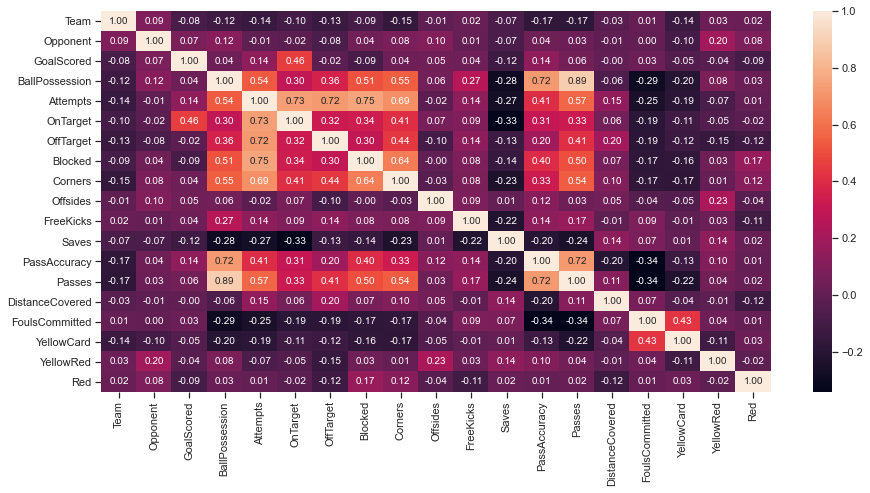

In [195]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [196]:
X = data.drop(['Team'], axis = 1)
Y = data.Team
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Opponent  GoalScored  BallPossession  Attempts  OnTarget  OffTarget  \
0        24           5              11        10         7          2   
1        23           0              31         3         0          2   
2        31           0              14         5         3          2   
3         8           1              28        11         4          5   
4        13           0              35        10         3          5   

   Blocked  Corners  Offsides  FreeKicks  Saves  PassAccuracy  Passes  \
0        3        6         3          5      0             8      15   
1        3        2         1         19      2            16      68   
2        2        0         1          2      3             8      40   
3        4        5         1          7      3            16      86   
4        4        5         0          8      2            16      49   

   DistanceCovered  FoulsCommitted  YellowCard  YellowRed  Red  
0               26              1

In [197]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     Opponent  GoalScored  BallPossession  Attempts  OnTarget  OffTarget  \
94         2           0              19        10         1          6   
30        25           1              28         7         4          4   
33        23           1              24        10         1          7   
2         31           0              14         5         3          2   
59         9           1              13         5         2          4   

    Blocked  Corners  Offsides  FreeKicks  Saves  PassAccuracy  Passes  \
94        5        7         3          9      3            18      62   
30        1        3         3         12      1            18      79   
33        4        4         0          5      1            11      51   
2         2        0         1          2      3             8      40   
59        1        2         0         11      1            18      41   

    DistanceCovered  FoulsCommitted  YellowCard  YellowRed  Red  

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [199]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 10.4585175185141
Средняя квадратичная ошибка: 140.8813757349963
Median absolute error: 8.465913475280326
Коэффициент детерминации: -0.35093920217966246


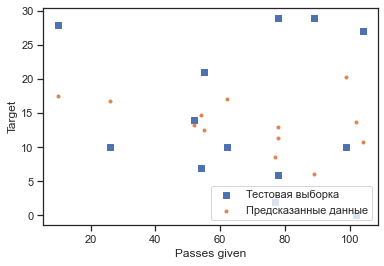

In [206]:
plt.scatter(X_test.Passes, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Passes, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Passes given')
plt.ylabel ('Target')
plt.show()

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [203]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [204]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 3.984615384615385
Средняя квадратичная ошибка: 21.12923076923077
Median absolute error: 3.8000000000000007
Коэффициент детерминации: 0.7973876532001816


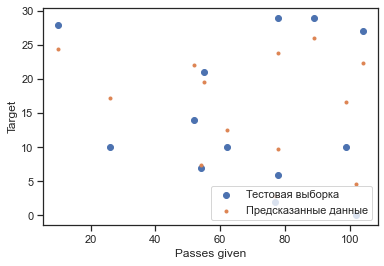

In [207]:
plt.scatter(X_test.Passes, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.Passes, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Passes given')
plt.ylabel('Target')
plt.show()